### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

Note: 
1) Perform all the Statistical analysis with 5%(Significance level).                           
2) Perform the test of normality and test of variance in the appropriate places.


### Data cleaning and EDA

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df.shape

(2000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Name                        2000 non-null object
Age                         2000 non-null int64
Nationality                 2000 non-null object
Overall_rating              2000 non-null int64
Potential                   2000 non-null int64
Club                        1981 non-null object
Preferred Foot              2000 non-null object
International Reputation    2000 non-null int64
Weak Foot                   2000 non-null int64
Skill Moves                 2000 non-null int64
Work Rate                   2000 non-null object
Position                    2000 non-null object
Jersey Number               2000 non-null int64
Height                      2000 non-null float64
Weight                      2000 non-null int64
dtypes: float64(1), int64(8), object(6)
memory usage: 234.5+ KB


In [9]:
df['Jersey Number'] = df['Jersey Number'].astype(str)
df

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R. BorrÃ©,22,Colombia,75,82,River Plate,Right,1,3,4,High/ Medium,RS,19,5.750000,157
1996,E. ZukanoviÄ‡,31,Bosnia Herzegovina,75,75,Genoa,Left,2,3,2,Low/ High,CB,87,6.250000,187
1997,A. Elis,22,Honduras,75,82,Houston Dynamo,Right,1,4,4,High/ Medium,RM,17,5.083333,170
1998,M. FernÃ¡ndez,32,Chile,75,75,Club Necaxa,Right,2,4,5,Medium/ Medium,LDM,14,5.083333,159


In [6]:
df.isna().sum()/len(df)

Name                        0.0000
Age                         0.0000
Nationality                 0.0000
Overall_rating              0.0000
Potential                   0.0000
Club                        0.0095
Preferred Foot              0.0000
International Reputation    0.0000
Weak Foot                   0.0000
Skill Moves                 0.0000
Work Rate                   0.0000
Position                    0.0000
Jersey Number               0.0000
Height                      0.0000
Weight                      0.0000
dtype: float64

In [7]:
df = df.dropna()
df.shape

(1981, 15)

In [8]:
df.duplicated().sum()

0

In [10]:
measures = df.describe()
measures.loc['var'] = df.var()
measures.loc['cov']  = (df.std()/df.mean())*100
measures.loc['skew'] = df.skew()
measures.loc['kurtosis'] = df.kurt()
measures

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,27.215548,78.212014,80.328117,1.777890,3.202928,2.920242,5.781886,169.483089
std,3.852519,3.293624,4.118002,0.812861,0.730443,0.964888,0.442515,16.053960
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,6.166667,181.000000
max,40.000000,94.000000,95.000000,5.000000,5.000000,5.000000,6.583333,227.000000
var,14.841900,10.847957,16.957941,0.660743,0.533547,0.931009,0.195819,257.729638
cov,14.155580,4.211148,5.126477,45.720554,22.805478,33.041375,7.653464,9.472308


In [11]:
df.describe(include='object')

,Name,Nationality,Club,Preferred Foot,Work Rate,Position,Jersey Number
count,1981,1981,1981,1981,1981,1981,1981
unique,1951,95,285,2,8,27,67
top,Danilo,Spain,Chelsea,Right,Medium/ Medium,GK,10
freq,3,251,24,1519,724,192,125


<AxesSubplot:>

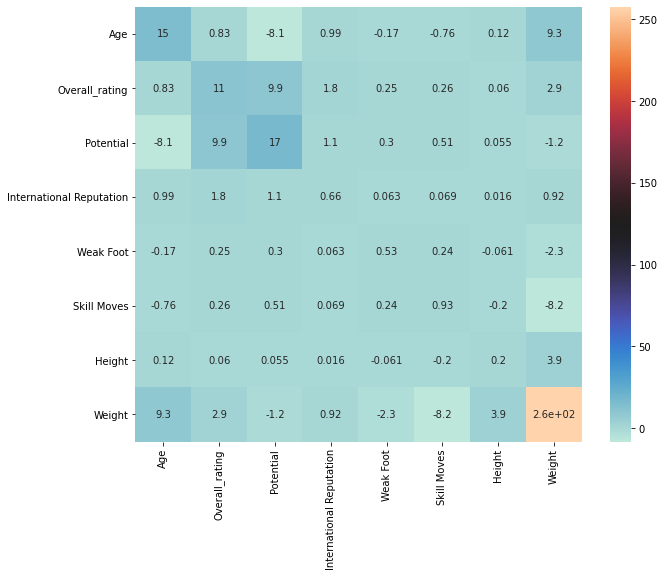

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.cov(),annot=True,cmap='icefire')

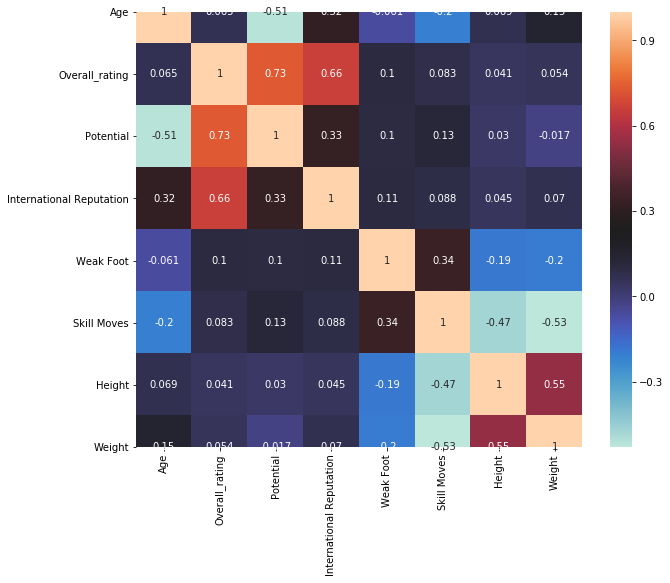

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='icefire')

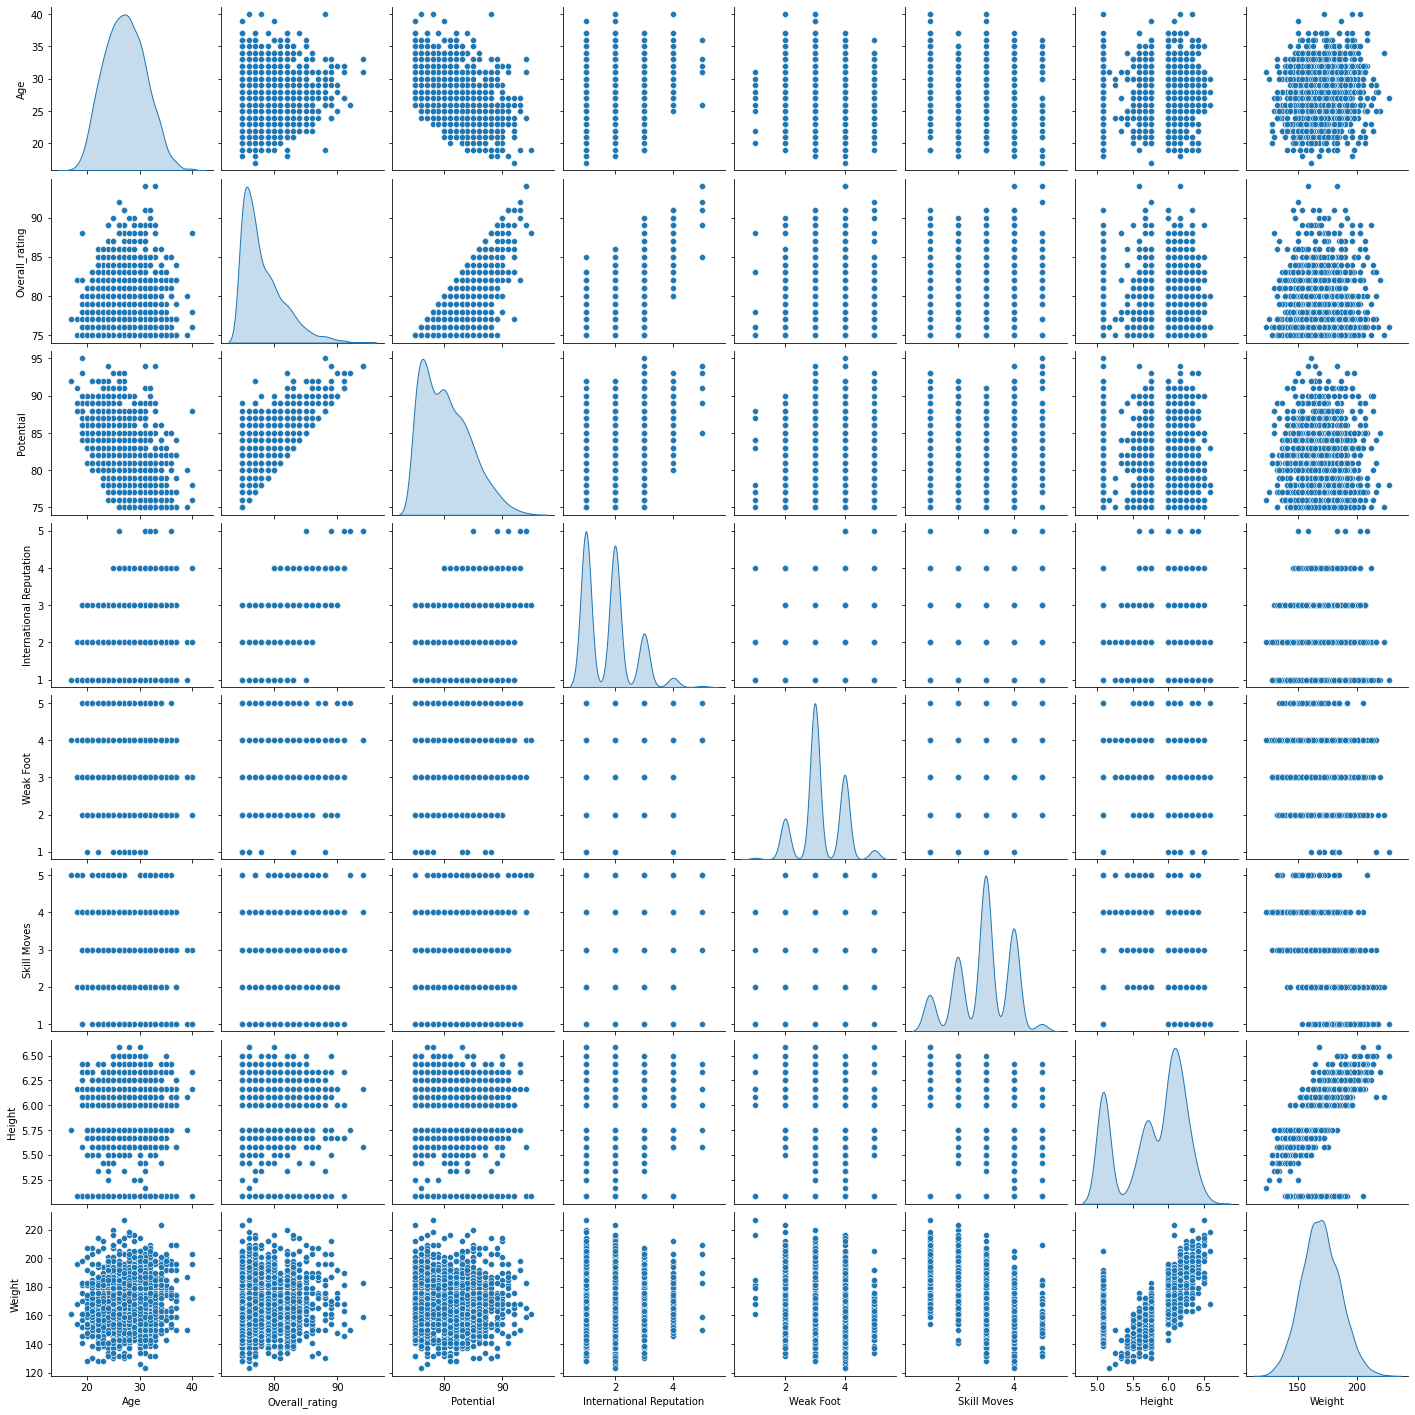

In [13]:
sns.pairplot(df,diag_kind='kde')

In [13]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers


In [14]:
df.shape

(1981, 15)

In [16]:
# removing outliers
for i in df.select_dtypes(exclude='object').columns:
    print('____________________________________________')
    print(i)
    sample_outliers = detect_outliers_zscore(df[i])
    df = df[~df[i].isin(sample_outliers)]
    print("Outliers from Z-scores method: ", sample_outliers)
    print(df.shape)

____________________________________________
Age
Outliers from Z-scores method:  [40, 39, 40, 40, 39]
(1976, 15)
____________________________________________
Overall_rating
Outliers from Z-scores method:  [94, 94, 92, 91, 91, 91, 91, 91, 91, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
(1951, 15)
____________________________________________
Potential
Outliers from Z-scores method:  [95, 93]
(1949, 15)
____________________________________________
International Reputation
Outliers from Z-scores method:  [5]
(1948, 15)
____________________________________________
Weak Foot
Outliers from Z-scores method:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(1938, 15)
____________________________________________
Skill Moves
Outliers from Z-scores method:  []
(1938, 15)
____________________________________________
Height
Outliers from Z-scores method:  []
(1938, 15)
____________________________________________
Weight
Outliers from Z-scores method:  [220, 218, 223]
(1935, 15)


### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

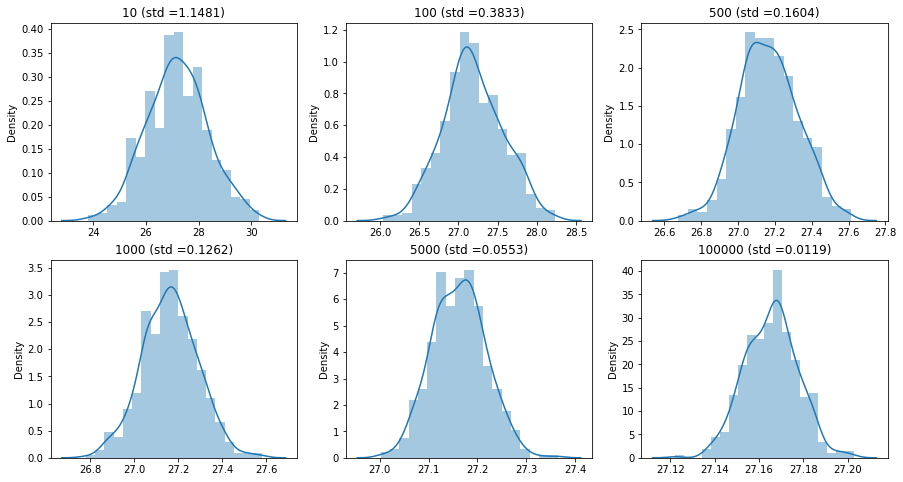

In [17]:
# sample size
num = [10, 100, 500, 1000,5000,100000] 
# list of sample means
means = [] 
 
# taking their mean and appending it to list means.
for j in num:
    np.random.seed(1)
    x = [np.mean(np.random.choice(df['Age'], j)) for i in range(500)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 3, figsize =(15, 8))
for i in range(0, 2):
    for j in range(0, 3):
        # Histogram for each x stored in means
        sns.distplot(means[k],ax= ax[i, j])
        ax[i, j].set_title(label = str(num[k])+' (std ='+str(round(np.std(means[k]),4))+')'  )
        k = k + 1
plt.show()

In [18]:
# The sample mean will approximately be normally distributed for large sample sizes, regardless of the distribution 
# from which we are sampling
# as the sample size increases the std decreases, which implies std-error decreases with increase in sample size

### b)	Is there any evidence that the players overall rating is greater than 80?

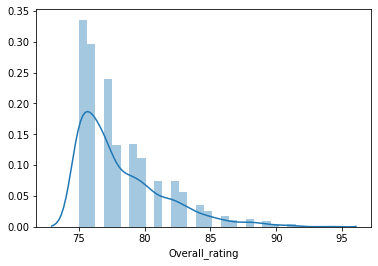

In [15]:
sns.distplot(df['Overall_rating'])

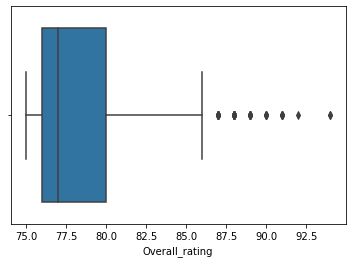

In [17]:
sns.boxplot(df['Overall_rating'])

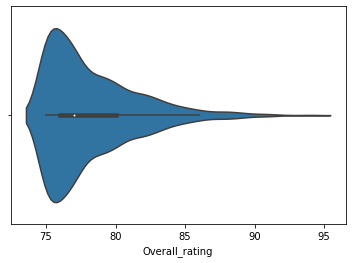

In [20]:
sns.violinplot(df['Overall_rating'])

In [20]:
df['Overall_rating'].describe()

count    1935.000000
mean       78.042894
std         2.990111
min        75.000000
25%        76.000000
50%        77.000000
75%        80.000000
max        88.000000
Name: Overall_rating, dtype: float64

In [21]:
# from the above details we can conclude that mean and median are less than 80
#  players overall rating is not greater than 80

In [22]:
# Statistical test

In [23]:
# H0 : mu<=80 , H1: mu>80
# try one sample t_test

In [24]:
# check for normality - to do a parametric test
# h0 : pop data normal, h1 : pop data not normal

In [25]:
st.shapiro(df['Overall_rating'])

ShapiroResult(statistic=0.8712517619132996, pvalue=2.9824729805164707e-37)

In [26]:
# pval<0.05 reject h0
# pop is not normaL
# abort parametric and try non-parametric

In [27]:
# H0 : med<=80 , H1: med>80

In [28]:
med = 80
diff = df['Overall_rating']-med

In [29]:
st.wilcoxon(diff,alternative='greater')

WilcoxonResult(statistic=280723.5, pvalue=1.0)

In [30]:
# pval > alpha, fail to reject h0 >> med<=80
# players overall rating is not greater than 80


### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

<AxesSubplot:xlabel='Potential', ylabel='Density'>

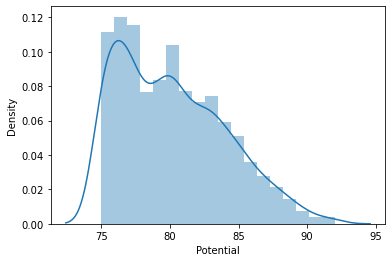

In [31]:
sns.distplot(df['Potential'])

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

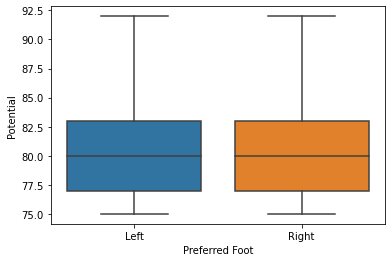

In [32]:
sns.boxplot(data=df,x='Preferred Foot',y='Potential')

In [33]:
df.groupby(['Preferred Foot'])['Potential'].describe()

,count,mean,std,min,25%,50%,75%,max
Preferred Foot,,,,,,,,
Left,450.0,80.475556,4.132071,75.0,77.0,80.0,83.0,92.0
Right,1485.0,80.083502,3.860754,75.0,77.0,80.0,83.0,92.0


In [34]:
# from the above details we can conclude that preferred foot has no impact on potential

In [35]:
# Statistical test

In [36]:
# h0: m1-m2 = 0, h1: m1-m2 !=0
# 2 sample t test

In [37]:
# check for normality - to do a parametric test
# h0 : pop data normal, h1 : pop data not normal

In [38]:
a = df[df['Preferred Foot']=='Left']['Potential']
b = df[df['Preferred Foot']=='Right']['Potential']

In [39]:
st.shapiro(a)

ShapiroResult(statistic=0.9461021423339844, pvalue=1.0039917681947674e-11)

In [40]:
st.shapiro(b)

ShapiroResult(statistic=0.9408055543899536, pvalue=6.719182713648765e-24)

In [41]:
# pval < alpha reject h0
# pop is not normaL
# abort parametric and try non-parametric

In [42]:
# mann whitney test

In [43]:
st.mannwhitneyu(a,b,alternative='two-sided')

MannwhitneyuResult(statistic=349577.0, pvalue=0.1353150731165066)

In [44]:
# pval > alpha fail to reject h0
#  we can conclude that preferred foot has no impact on potential

### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [45]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

<AxesSubplot:xlabel='Overall_rating', ylabel='Potential'>

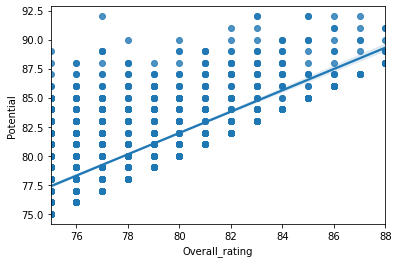

In [46]:
sns.regplot(data=df,x='Overall_rating',y='Potential')

In [47]:
# from the above details we can conclude that there is a positive relation between overall_rating and potential

In [48]:
# h0: there is no relation h1: there is relation

In [49]:
# pearson r test

In [50]:
# check for normality - to do a parametric test
# h0 : pop data normal, h1 : pop data not normal

In [51]:
st.shapiro(df['Overall_rating']),st.shapiro(df['Potential'])

(ShapiroResult(statistic=0.8712517619132996, pvalue=2.9824729805164707e-37),
 ShapiroResult(statistic=0.9423821568489075, pvalue=8.126942882828038e-27))

In [52]:
# pval< alpha - reject h0
# pop is not normaL
# abort parametric and try non-parametric

In [53]:
st.spearmanr(df['Overall_rating'],df['Potential'])

SpearmanrResult(correlation=0.6741303214923615, pvalue=1.1996564012572679e-256)

<AxesSubplot:>

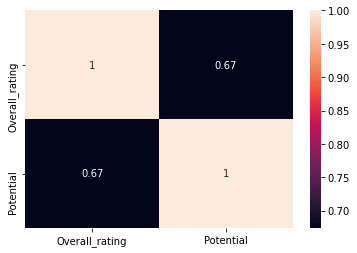

In [54]:
sns.heatmap(df[['Overall_rating','Potential']].corr(method='spearman'),annot=True)

In [55]:
# pval < alpha reject h0
# there is a positive relation between overall_rating and potential

### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [56]:
df[['Skill Moves','Overall_rating']].corr(method='spearman')
# no significant relation

,Skill Moves,Overall_rating
Skill Moves,1.000000,0.112613
Overall_rating,0.112613,1.000000


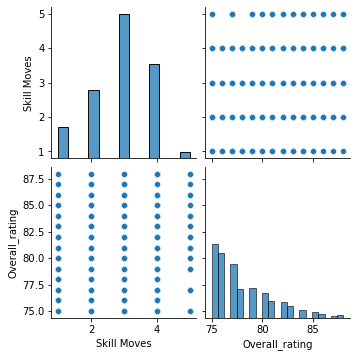

In [57]:
sns.pairplot(df[['Skill Moves','Overall_rating']])

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

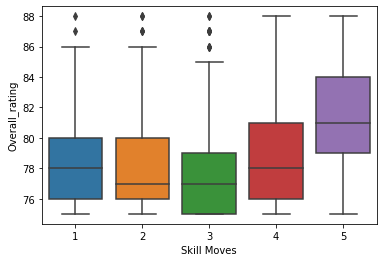

In [58]:
sns.boxplot(data=df,x='Skill Moves',y='Overall_rating')

In [59]:
df.groupby('Skill Moves')['Overall_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Skill Moves,,,,,,,,
1,177.0,78.322034,3.047581,75.0,76.0,78.0,80.0,88.0
2,385.0,77.953247,3.132141,75.0,76.0,77.0,80.0,88.0
3,809.0,77.480841,2.661132,75.0,75.0,77.0,79.0,88.0
4,529.0,78.654064,3.043776,75.0,76.0,78.0,81.0,88.0
5,35.0,81.371429,3.507016,75.0,79.0,81.0,84.0,88.0


In [60]:
# players having more than 3 skill moves have a higher overall rating

In [61]:
# Statistical test - anova
# H0: µ1 = µ2 = µ3 = µ4 
# H1  : At least one µi is different (i=1, 2, 3, 4)

In [62]:
df['Skill Moves'].value_counts()

3    809
4    529
2    385
1    177
5     35
Name: Skill Moves, dtype: int64

In [63]:
a = df[df['Skill Moves']==1]['Overall_rating']
b = df[df['Skill Moves']==2]['Overall_rating']
c = df[df['Skill Moves']==3]['Overall_rating']
d = df[df['Skill Moves']==4]['Overall_rating']
e = df[df['Skill Moves']==5]['Overall_rating']

In [64]:
# check for normality - to do a parametric test
# h0 : pop data normal, h1 : pop data not normal

In [65]:
st.shapiro(a),st.shapiro(b),st.shapiro(c),st.shapiro(d),st.shapiro(e)

(ShapiroResult(statistic=0.8987811803817749, pvalue=1.2231941015627967e-09),
 ShapiroResult(statistic=0.8413820862770081, pvalue=3.0812694952511076e-19),
 ShapiroResult(statistic=0.8367112278938293, pvalue=5.558021004242708e-28),
 ShapiroResult(statistic=0.9151468873023987, pvalue=1.2096850743631047e-16),
 ShapiroResult(statistic=0.9716686606407166, pvalue=0.49071478843688965))

In [66]:
st.levene(a,b,c,d,e)

LeveneResult(statistic=7.2104173877303745, pvalue=9.237031086786404e-06)

In [67]:
# pval< alpha - reject h0
# pop is not normaL
# abort parametric and try non-parametricst.levene(a,b,c,d,e)

In [68]:
# kruskal
st.kruskal(a,b,c,d,e)

KruskalResult(statistic=91.41107384450325, pvalue=6.602461710486839e-19)

In [69]:
# pval < alpha reject h0 , any 2 pop mean are not equal
# players having more than 3 skill moves have a higher overall rating

In [70]:
# assuming all assumptions are passed trying anova
st.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=25.186032083981274, pvalue=2.3152580057837163e-20)

### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [71]:
df = pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [72]:
df.shape

(820, 6)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [74]:
# changing datatype of date
df['date'] = pd.to_datetime(df['date'])

In [75]:
# percentage of na
df.isna().sum()/len(df)

date            0.0
duration        0.0
item            0.0
month           0.0
network         0.0
network_type    0.0
dtype: float64

In [76]:
# removing the na rows
df = df.dropna()
df.shape

(820, 6)

In [77]:
# check for duplicated rows
df.duplicated().sum()

0

In [78]:
# measures of central tendancy and dispersion
measures = df.describe()
measures.loc['var'] = df.var()
measures.loc['cov']  = (df.std()/df.mean())*100
measures.loc['skew'] = df.skew()
measures.loc['kurtosis'] = df.kurt()
measures

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090
var,2087.372951
cov,31.660578


In [79]:
# descriptive stats for categorical data
df.describe(include='object')

,item,month,network,network_type
count,820,820,820,820
unique,3,5,7,4
top,call,2014-11,Three,mobile
freq,388,229,215,601


In [80]:
# checking for outliers
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code


In [81]:
df.shape

(820, 6)

In [82]:
# removing outliers
for i in df.select_dtypes(include='float').columns:
    print('____________________________________________')
    print(i)
    sample_outliers = detect_outliers_zscore(df[i])
    df = df[~df[i].isin(sample_outliers)]
    print("Outliers from Z-scores method: ", sample_outliers)
    print(df.shape)

____________________________________________
duration
Outliers from Z-scores method:  [0.9935142600000012]
(819, 6)


### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [83]:
n = len(df)
avg = df['duration'].mean()
std = df['duration'].std()

In [84]:
# 95% confidence
st.norm.interval(0.95,loc=avg,scale=std/np.sqrt(n))

(141.36788954009322, 147.59194842035876)

In [85]:
# 99% confidence
st.norm.interval(0.99,loc=avg,scale=std/np.sqrt(n))

(140.3900190184764, 148.56981894197557)

In [86]:
# 99% confidence intevrval is wider

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [87]:
df['network'].value_counts()

Three        215
Vodafone     215
data         149
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [88]:
from statsmodels.stats.proportion import proportions_ztest

In [89]:
# one sample z proportion
# h0: p=0.26, h1: p!=0.26

In [113]:
proportions_ztest([215,len(df)-215],[len(df),len(df)])

(-19.223065612077892, 2.3732528357000468e-82)

In [91]:
# pval < alpha reject h0
# population proportions are not equal

### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

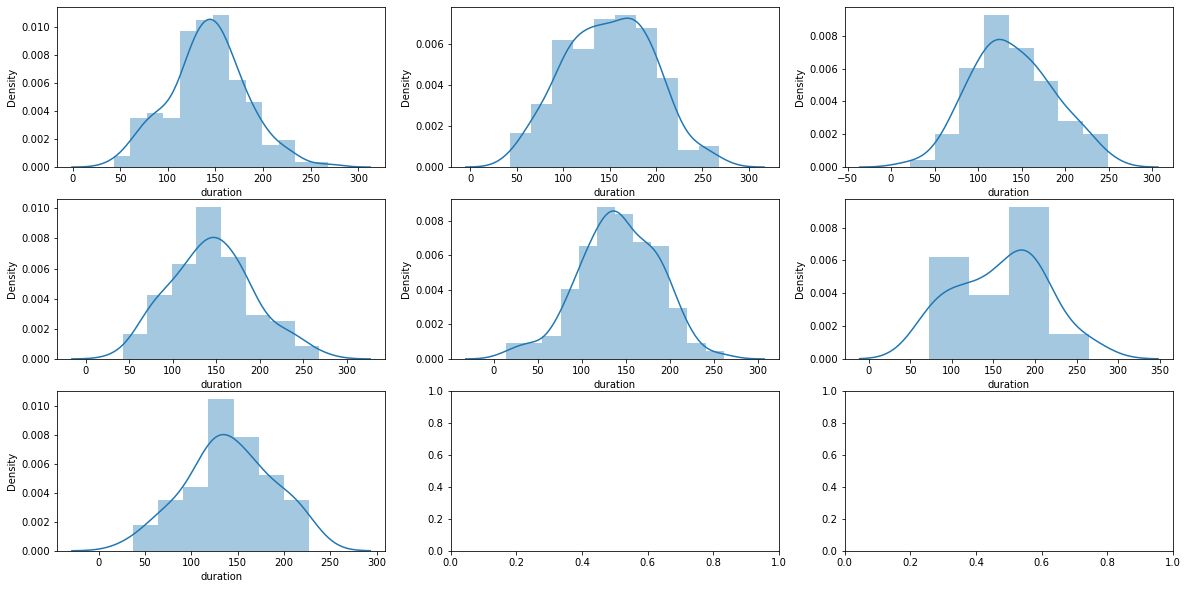

In [92]:

plt.subplots(3,3,figsize=(20,10))

k=1
for i in df['network'].unique():
    plt.subplot(3,3,k)
    sns.distplot(df[df['network']==i]['duration'])
    k=k+1

<AxesSubplot:xlabel='network', ylabel='duration'>

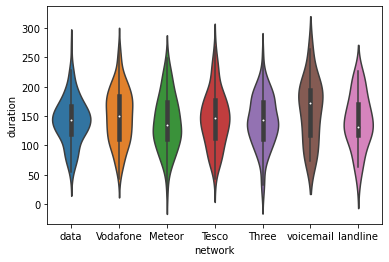

In [93]:
sns.violinplot(data=df,y='duration',x='network')

In [94]:
# distribution of duration with respect to each network is similar

### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [95]:
df.groupby('item')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
call,388.0,147.603372,46.554012,15.927469,116.542553,145.932586,179.266278,268.443922
data,149.0,141.908073,39.921416,43.303115,119.556995,143.333031,166.382821,268.458090
sms,282.0,141.541286,46.484331,14.173899,106.675037,141.151719,176.110937,268.343460


In [96]:
df['item'].value_counts()

call    388
sms     282
data    149
Name: item, dtype: int64

In [97]:
# Statistical test - anova
# H0: µ1 = µ2 = µ3 = µ4 
# H1  : At least one µi is different (i=1, 2, 3, 4)

In [98]:
a = df[df['item']=='call']['duration']
b = df[df['item']=='sms']['duration']
c = df[df['item']=='data']['duration']


In [99]:
# check for normality - to do a parametric test
# h0 : pop data normal, h1 : pop data not normal

In [100]:
st.shapiro(a),st.shapiro(b),st.shapiro(c)

(ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708),
 ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526),
 ShapiroResult(statistic=0.9919514656066895, pvalue=0.5642256140708923))

In [101]:
# pval > alpha - fail to reject h0
# pop is normaL

In [102]:
st.levene(a,b,c)

LeveneResult(statistic=4.32318898766987, pvalue=0.0135625204012215)

In [103]:
# pval < alpha - reject h0
# pop don't have equal variances

In [104]:
# abort parametric and try non-parametric 

In [105]:
# kruskal
st.kruskal(a,b,c)

KruskalResult(statistic=3.364708715805591, pvalue=0.1859357011264951)

In [106]:
# pval > alpha fail to reject h0 , pop mean are equal

In [107]:
# assuming all assumptions are passed trying anova
st.f_oneway(a,b,c)

F_onewayResult(statistic=1.7481874332701346, pvalue=0.17474058011673607)

### e) Perform statistical tests to identify the relation between network and network_type. 

In [108]:
# h0 : there is no association btw network and networkk_type
# h1 : there is association btw network and networkk_type

In [109]:
table = pd.crosstab(df['network'],df['network_type'])
table

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,87,0
Tesco,0,0,84,0
Three,0,0,215,0
Vodafone,0,0,215,0
data,149,0,0,0
landline,0,42,0,0
voicemail,0,0,0,27


In [110]:
st.chi2_contingency(table)

(2457.0,
 0.0,
 18,
 array([[ 15.82783883,   4.46153846,  63.84249084,   2.86813187],
        [ 15.28205128,   4.30769231,  61.64102564,   2.76923077],
        [ 39.11477411,  11.02564103, 157.77167277,   7.08791209],
        [ 39.11477411,  11.02564103, 157.77167277,   7.08791209],
        [ 27.10744811,   7.64102564, 109.33943834,   4.91208791],
        [  7.64102564,   2.15384615,  30.82051282,   1.38461538],
        [  4.91208791,   1.38461538,  19.81318681,   0.89010989]]))

In [111]:
# pval
st.chi2.sf(2457,18)

0.0

In [112]:
#pval < alpha reject h0
# network and network_type are associated